# NLE Assessed Coursework 3: Question 2

For this assessment, you are expected to complete and submit 4 notebook files.  There is 1 notebook file for each question (to speed up load times).  This is notebook 2 out of 4.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [1]:
candidateno=198735 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#preliminary imports
import sys
sys.path.append(r'/Users/Joe/Documents/Python Scripts/resources/resources')
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')


import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from sussex_nltk.corpus_readers import ReutersCorpusReader
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import math
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic
import operator

def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist



Sussex NLTK root directory is /Users/Joe/Documents/Python Scripts/resources/resources


## Question 2: Distributional Semantics (25 marks)


In [3]:
rcr = ReutersCorpusReader().finance()
rcr.enumerate_sents()

1113359

In [4]:
random.seed(candidateno)  
samplesize=2000
iterations =100
sentences=[]
for i in range(0,iterations):
    sentences+=[normalise(sent) for sent in rcr.sample_sents(samplesize=samplesize)]
    print("Completed {}%".format(i))
print("Completed 100%")

Completed 0%
Completed 1%
Completed 2%
Completed 3%
Completed 4%
Completed 5%
Completed 6%
Completed 7%
Completed 8%
Completed 9%
Completed 10%
Completed 11%
Completed 12%
Completed 13%
Completed 14%
Completed 15%
Completed 16%
Completed 17%
Completed 18%
Completed 19%
Completed 20%
Completed 21%
Completed 22%
Completed 23%
Completed 24%
Completed 25%
Completed 26%
Completed 27%
Completed 28%
Completed 29%
Completed 30%
Completed 31%
Completed 32%
Completed 33%
Completed 34%
Completed 35%
Completed 36%
Completed 37%
Completed 38%
Completed 39%
Completed 40%
Completed 41%
Completed 42%
Completed 43%
Completed 44%
Completed 45%
Completed 46%
Completed 47%
Completed 48%
Completed 49%
Completed 50%
Completed 51%
Completed 52%
Completed 53%
Completed 54%
Completed 55%
Completed 56%
Completed 57%
Completed 58%
Completed 59%
Completed 60%
Completed 61%
Completed 62%
Completed 63%
Completed 64%
Completed 65%
Completed 66%
Completed 67%
Completed 68%
Completed 69%
Completed 70%
Completed 71%
Co

In [5]:
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

a) **Run** `generate_features(sentences[:5])`.  With reference to the code and the specific examples, **explain** how the output was generated. \[4 marks\]

In [6]:
print(generate_features(sentences[:5]))

{'roosevelt': {'&': 1}, '&': {'roosevelt': 1, 'cross': 1}, 'cross': {'&': 1, ',': 1}, ',': {'cross': 1, 'inc.': 2, 'said': 1, 'ufsd': 1, 'n.y.': 2, 'school': 1, 'bonds': 1, 'NUM': 1, 'a': 1, 'with': 1, 'littlewoods': 1, 'which': 1, 'group': 1, 'industry': 1}, 'inc.': {',': 2}, 'said': {',': 1, 'it': 1, 'sources': 1, '.': 1}, 'it': {'said': 1, 'won': 1}, 'won': {'it': 1, '$': 1}, '$': {'won': 1, 'NUM': 1}, 'NUM': {'$': 1, 'million': 1, ',': 1, 'series': 1, 'of': 1, 'percent': 1, '08/15/2007': 1}, 'million': {'NUM': 1, 'of': 1}, 'of': {'million': 1, 'west': 1, 'cost': 1, 'NUM': 1}, 'west': {'of': 1, 'hempstead': 1}, 'hempstead': {'west': 1, 'ufsd': 1}, 'ufsd': {'hempstead': 1, ',': 1}, 'n.y.': {',': 2}, 'school': {',': 1, 'district': 1}, 'district': {'school': 1, 'bonds': 1}, 'bonds': {'district': 1, ',': 1}, 'series': {'NUM': 1, 'a': 1}, 'a': {'series': 1, ',': 1, 'with': 1, 'net': 1}, 'with': {',': 1, 'a': 1, 'agreement': 1, 'littlewoods': 1}, 'net': {'a': 1, 'interest': 1}, 'interest'

The input was the first 5 sentences in the list of sentences. Each of which is a list of words. The function then iterates through the sentences and for each sentence it enumerates it, which adds a counter to the strings of words. It iterates through these words. If the particular word has come up before, it sets current to the set of features next to this word, otherwise it sets current to an empty set. It then calculates features by taking all words bar the current word in the window specified in the parameters, and adds this to a list of features. This is then iterated through and a dictionary is added to with these features. This is then set as the value for the that key which is this particular word. The return value is a dictionary of dictionaries, of which the key is the word and the value is a dictionary where the key is a feature and the value is the amount of times seen.

b) Write code and **find** the 100 most frequently occurring words that
* are in your sample; AND
* have at least one noun sense according to WordNet
\[ 4 marks\]

In [7]:
def freq_words(sentences, output=100):
    dict_freq = {}
    for sentence in sentences:
        for word in sentence:
            if dict_freq.get(word,0) != 0:
                dict_freq[word] = dict_freq[word] + 1
            else:
                if len(wn.synsets(word, wn.NOUN)) > 0:
                    dict_freq[word] = 1
                
    return sorted(dict_freq.items(),key=operator.itemgetter(1), reverse=True)[:output]
freq_words(sentences)

[('in', 55989),
 ('a', 49039),
 ('percent', 17577),
 ('it', 15344),
 ('be', 14656),
 ('pct', 14133),
 ('at', 14061),
 ('was', 13329),
 ('will', 11071),
 ('he', 10996),
 ('as', 10767),
 ('bank', 9297),
 ('million', 8811),
 ('are', 8758),
 ('has', 8677),
 ('have', 8674),
 ('year', 8621),
 ('its', 8351),
 ('may', 8279),
 ('government', 8238),
 ('an', 7862),
 ('billion', 7324),
 ('tax', 5814),
 ('uk', 5717),
 ('trade', 5487),
 ('rate', 5405),
 ('budget', 4953),
 ('more', 4791),
 ('last', 4590),
 ('growth', 4575),
 ('u.s.', 4429),
 ('first', 4384),
 ('central', 4185),
 ('june', 4064),
 ('market', 4019),
 ('newsroom', 3982),
 ('price', 3902),
 ('over', 3889),
 ('union', 3880),
 ('there', 3831),
 ('or', 3828),
 ('state', 3807),
 ('inflation', 3643),
 ('bonds', 3642),
 ('no', 3542),
 ('minister', 3423),
 ('one', 3419),
 ('economy', 3393),
 ('week', 3389),
 ('prices', 3357),
 ('currency', 3295),
 ('rates', 3280),
 ('april', 3250),
 ('deficit', 3191),
 ('two', 3180),
 ('can', 3147),
 ('interest'

c) Write code to create distributional vector representations of each word in the corpus with a parameter to specify context window size.   \[5 marks \]

In [8]:
def dot(vecA,vecB):
    the_sum=0
    for (key,value) in vecA.items():
        the_sum+=value*vecB.get(key,0)
    return the_sum

class word_vectors:
    def __init__(self,sentences,window=1):
        self.sentences=sentences
        self.window=window
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
        self.convert_to_ppmi()
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
    
    def similarity(self,word1,word2):
        rep1=self.ppmi.get(word1,{})
        rep2=self.ppmi.get(word2,{})
        return dot(rep1,rep2)/math.sqrt(dot(rep1,rep1)*dot(rep2,rep2))
    


d) Plan and carry out an investigation into the correlation between semantic similarity according to the WordNet path similarity measure and distributional similarity with different context window sizes.  You should make sure that you include a graph of how correlation varies with context window size and that you discuss your results.  \[12 marks\]

The plan for this investigation is to have 5 context window sizes; 1, 2, 3, 4, and 5. For each context window all sentences will be tested, a total of 20000; which will be kept at a constant number throughout the investigation, and be the same sentences. The top 10 words will then be extracted which give us the least anomalies in the data; these words of course have at least 1 noun sense. The similarities will then be tested upon them; with the cosine calculated for each word and feature pairing and the path similarity calculated for each pairing also, assuming the word sense for both word and feature is the first noun sense everytime. Due to the shear amount of data produced by the code and the fact that there is more data with an increase in context window size, it is difficult to display this in a table then a graph, therefore a random sample is used from the data to show the correlation in the graph.

In [9]:
contextsize = [1,2,3,4,5]
test_words = freq_words(sentences,10)
results = {}
for window in contextsize:
    current_results = [] #stores pairs of results for cosine then wordnet
    vector_instance = word_vectors(sentences,window)
    for word,num in test_words:
        for feature in vector_instance.ppmi[word].keys():
            if len(wn.synsets(feature,wn.NOUN)) > 0:
                cosine = vector_instance.similarity(word,feature)
                path =  (wn.synsets(word,wn.NOUN)[0]).path_similarity(wn.synsets(feature,wn.NOUN)[0])
                current_results.append((cosine,path))
    results[window] = current_results
    print("Context window size {} just completed.".format(window))
    

Context window size 1 just completed.
Context window size 2 just completed.
Context window size 3 just completed.
Context window size 4 just completed.
Context window size 5 just completed.


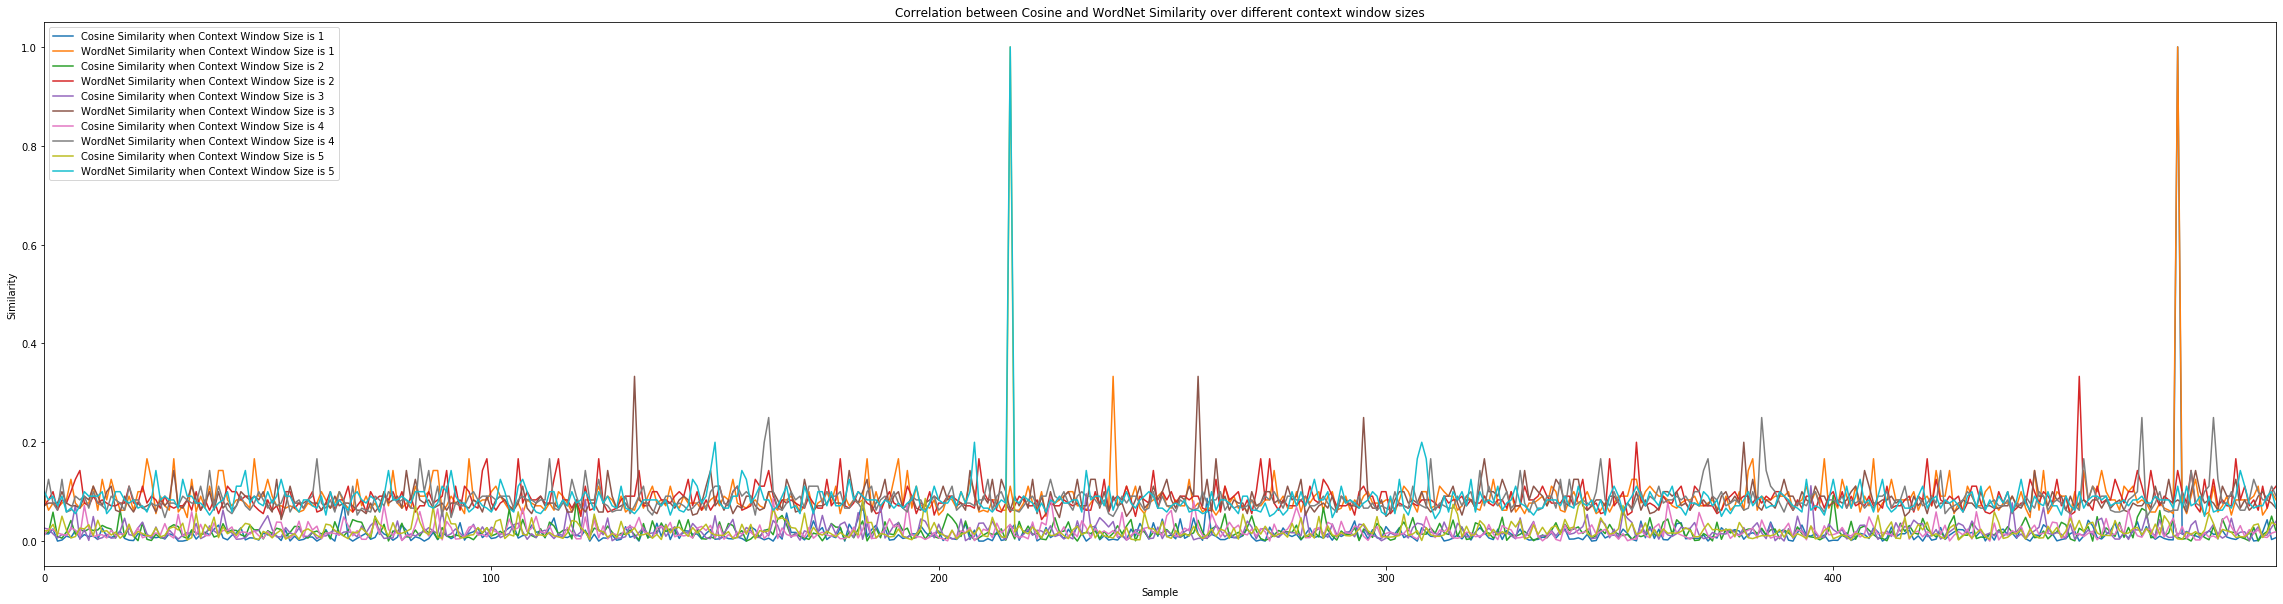

In [43]:
raw = {}
samplesize = 500
for size in results.keys():
    raw[size] = random.sample(results[size], samplesize)

graph_data = {'Sample' : [n for n in range(samplesize)]}
for size in raw.keys():
    cos_data = []
    word_data = []
    for cosine,wordnet in raw[size]:
        cos_data.append(cosine)
        word_data.append(wordnet)
    graph_data['Cosine Similarity when Context Window Size is {}'.format(size)] = cos_data
    graph_data['WordNet Similarity when Context Window Size is {}'.format(size)] = word_data
graph = pd.DataFrame(graph_data)
graph.set_index('Sample', inplace = True)
plot = graph.plot(title = 'Correlation between Cosine and WordNet Similarity over different context window sizes', figsize = (40,10))
plot.set_ylabel('Similarity')
plot

#### Results
The results show a strict correlation between WordNet similarity and Cosine similarity, with the WordNet similarity having a higher average similarity. These correlate, but have increases and decreases on average where there is more similarity. We can see however that the increase in context window size doesn't necessarily increase the word similarity. 

The above might be due to the data that we used, the same top 10 words rather than the whole corpus, giving only slight differences each time due to the contex window increasing. Also, these nouns might not be similar to other words at all due to them being quite generic like *'in'* or *'a'* and therefore not being similar to other words. Also, to make note *'pct'* and *'percent'* are considered the same in WordNet similarity, and these are both in the top 10 noun words in the dataset. Removing these similar words could lead to more elaborate results.

Overall, the results show that the correlation between Cosine similarity and WordNet similarity doesn't change when we increase context window sizes. Therefore, we can conclude that words near other words are most likely not related to each other.

In [2]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="a3_2.ipynb"
question_count=204

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 528
